## Análisis exploratorio de datos (EDA)

In [1]:
# Importo las librerias

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
%matplotlib inline 


direccion = "./clientes_banco.csv"
dataset = pd.read_csv(direccion)


# Elimino las últimas dos columnas que sobran
dataset.drop(dataset.columns[len(dataset.columns)-1], axis=1, inplace=True)
dataset.drop(dataset.columns[len(dataset.columns)-1], axis=1, inplace=True)


dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [2]:
dataset.describe()

# La edad de los clientes va de los 26 a 73 años. La edad promedio de un cliente es de 46 años.
# En promedio la edad de un cliente es de se desvia 8 años de la media

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [3]:
# Observamos las distintas opciones para cada feature
for columna in dataset:
    valores_unicos = np.unique(dataset[columna])
    nro_valores = len(valores_unicos)
    if nro_valores < 8:
        print('Valores para {} : {} -- {}'.format(columna, nro_valores,valores_unicos))
    else:
        print('Valores para {} : {}'.format(columna, nro_valores))


Valores para CLIENTNUM : 10127
Valores para Attrition_Flag : 2 -- ['Attrited Customer' 'Existing Customer']
Valores para Customer_Age : 45
Valores para Gender : 2 -- ['F' 'M']
Valores para Dependent_count : 6 -- [0 1 2 3 4 5]
Valores para Education_Level : 7 -- ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Valores para Marital_Status : 4 -- ['Divorced' 'Married' 'Single' 'Unknown']
Valores para Income_Category : 6 -- ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Valores para Card_Category : 4 -- ['Blue' 'Gold' 'Platinum' 'Silver']
Valores para Months_on_book : 44
Valores para Total_Relationship_Count : 6 -- [1 2 3 4 5 6]
Valores para Months_Inactive_12_mon : 7 -- [0 1 2 3 4 5 6]
Valores para Contacts_Count_12_mon : 7 -- [0 1 2 3 4 5 6]
Valores para Credit_Limit : 6205
Valores para Total_Revolving_Bal : 1974
Valores para Avg_Open_To_Buy : 6813
Valores para Total_Amt_Chng_Q4_Q1 : 1158
Valores para Total_Trans

In [4]:
# Chequeo si hay nulls en el dataset
dataset.isnull().sum()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
# Separamos nuestras características en categóricas y numéricas

df_num = dataset[['Customer_Age','Dependent_count','Months_on_book',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',
                  'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                  'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

df_cat = dataset[['Attrition_Flag','Education_Level','Marital_Status','Income_Category','Card_Category']]


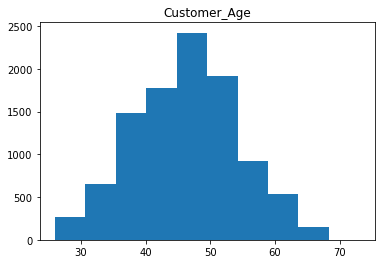

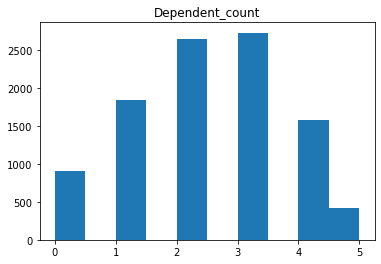

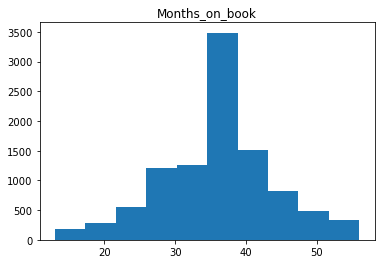

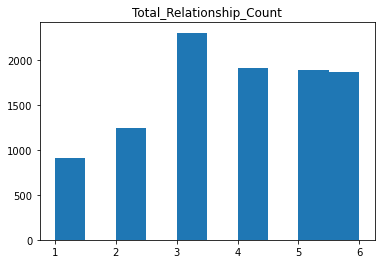

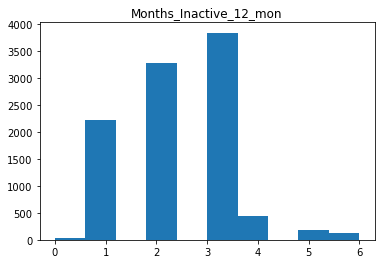

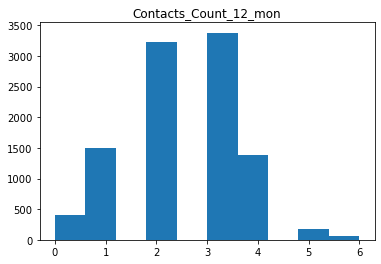

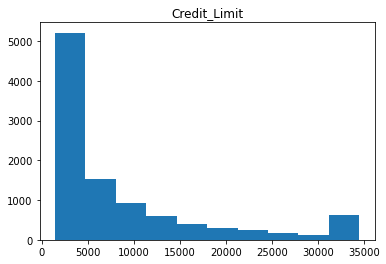

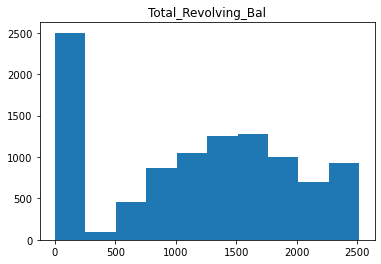

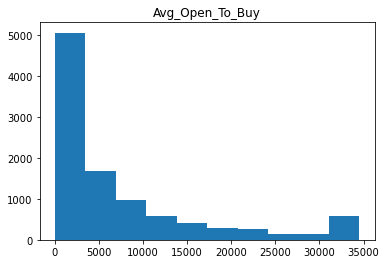

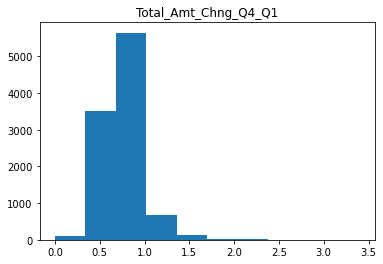

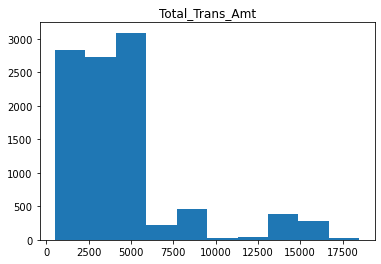

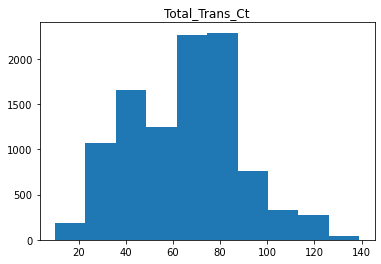

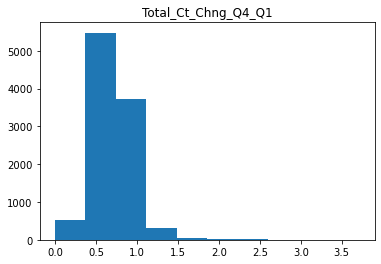

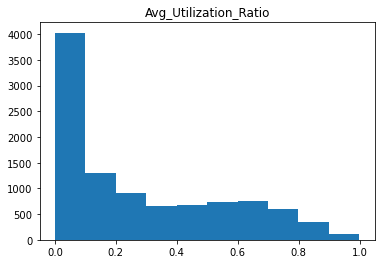

In [6]:
# Realizo un histograma de cada una de las variables numéricas para extraer información

for titulo in df_num.columns:
    plt.hist(df_num[titulo])
    plt.title(titulo)
    plt.show()


#### De los histogramas se obtiene la siguiente información relevante

#### * Se destaca que la gran mayoría de los clientes se va a los aprox. 38 meses. Es altamente recomendable analizar en el funcionamiento del sistema y que es lo que motiva que tantos clientes quieran quedarse 38 meses y no mas  ni menos tiempo


#### * La edad cuyo promedio es 46 años se distribuye con una cierta asimetría derecha.
#### * Se observa que hay mas clientes menores de 46 años que mayores de 46

#### * La mayoría de los clientes tiene entre 2 y 3 hijos




#### * La mayoría de los clientes posee 3 productos del banco aunque es comun en similar medida que posean 4 5 o 6 productos


#### * Los clientes en su mayoría están inactivos 3 meses, 2 meses o 1 mes en el último año
#### * El banco se contactó con los clientes en su mayoria 3 o 2 veces en el último año

#### * Mas de la mitad de los clientes tienen un limite crediticio de hasta 5000usd

<AxesSubplot:>

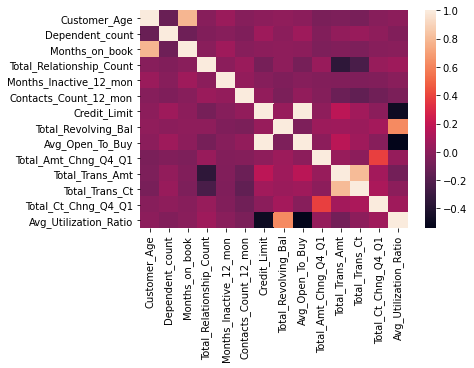

In [7]:
# Correlación lineal entre las variables que son numéricas
# Trazamos un heatmap
sns.heatmap(df_num.corr()) 


In [8]:
# Veamos cada variable numérica vs las personas agotadas del servicio
pd.pivot_table(dataset, index = 'Attrition_Flag', values = ['Customer_Age','Dependent_count','Months_on_book',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',
                  'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                  'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'])

,Avg_Open_To_Buy,Avg_Utilization_Ratio,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,7463.216472,0.162475,2.972342,8136.039459,46.659496,2.402581,2.693301,36.178242,0.694277,0.554386,3.279656,672.822987,3095.025814,44.933620
Existing Customer,7470.273400,0.296412,2.356353,8726.877518,46.262118,2.335412,2.273765,35.880588,0.772510,0.742434,3.914588,1256.604118,4654.655882,68.672588


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


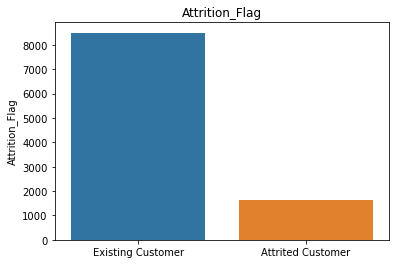

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


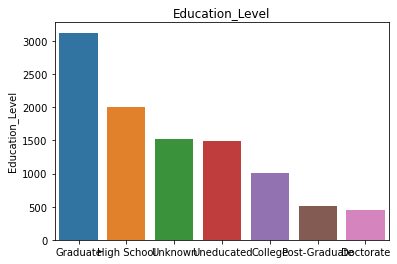

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


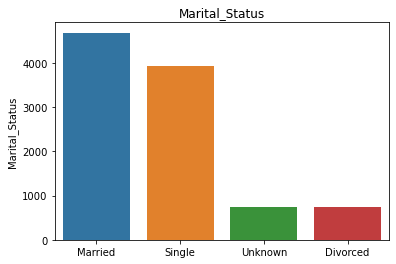

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


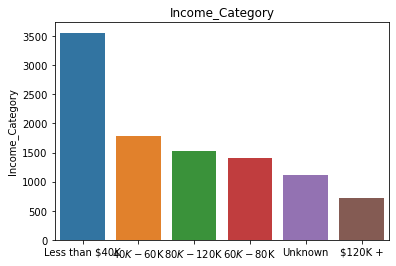

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


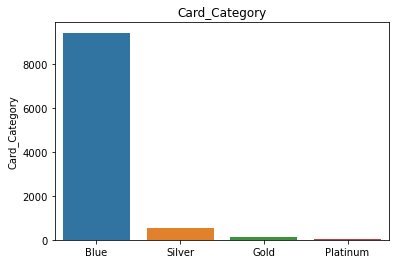

In [9]:
# Y ahora expreso en gráficos de barras las variables cualitativas

for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

#### De los diagramas de barra se obtiene la siguiente información relevante:

#### * La mayoría de los clientes posee un título de grado, está casado/a y gana un sueldo menor a 40.000 usd anuales
 
#### * La gran mayoría de los clientes tiene una tarjeta de categoría azul

## Preparación de Datos

In [10]:
# Convierto los floats en int

dataset['Credit_Limit'] = dataset['Credit_Limit'].astype(int)
dataset['Avg_Open_To_Buy'] = dataset['Avg_Open_To_Buy'].astype(int)


# Codificación One-Hot
dataset = pd.get_dummies(dataset, columns = [ 'Gender', 'Education_Level', 'Marital_Status', 
                                             'Income_Category', 'Card_Category'])

# Convertimos 'Existin Customer' en 0 y 'Attried Customer' en 1
dataset['Attrition_Flag'] = pd.factorize( dataset['Attrition_Flag'] )[0]
                                                                            

dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
# Quedaron 40 columnas pero este método es mas adecuado para convertir las variables categóricas en numéricas
# ya que enumerando las opciones de la forma anterior le estabamos asignando mayor valor a una opción que a otra
# Quizás el método utilizado en la actualización anterior podría haber servido para variables que sean categóricas pero ordinales

dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_

In [12]:
# Normalizamos las features con MinMax scaler

features_a_escalar = ['Customer_Age','Months_on_book','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
scaler = MinMaxScaler()
dataset[features_a_escalar] = scaler.fit_transform(dataset[features_a_escalar])
dataset.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,0.404255,3,0.604651,5,1,3,0.340196,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,0.489362,5,0.720930,6,1,2,0.206119,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,0.531915,3,0.534884,4,1,0,0.059859,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,0.297872,4,0.488372,3,4,1,0.056684,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,0.297872,3,0.186047,5,1,0,0.099099,0,...,0,0,1,0,0,0,1,0,0,0


In [13]:
## Primero probaremos DecisionTree, después Random Forest y por último XGBoost 


# Dividimos en train y test
from sklearn.model_selection import train_test_split


X = dataset.iloc[:, 2:39]
y = dataset.iloc[:, 1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

print('Forma de X: {}'.format(np.shape(X)))
print('Forma de y: {}'.format(np.shape(y)))


Forma de X: (10127, 37)
Forma de y: (10127,)


## Implemento algoritmos

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0) # Definimos el modelo

modelo.fit(X_train, y_train)   # Y lo entrenamos

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [15]:
dataset.drop('CLIENTNUM', inplace=True, axis=1)

# Calculamos la importancia de cada característica para el modelo

for i, columna in enumerate(dataset.drop('Attrition_Flag', axis=1)):
    print('Importancia de la caracteristica {}:, {:.3f}'.format(columna, modelo.feature_importances_[i]))
    
    ic = pd.DataFrame({'Caracteristica': [columna], 'Importancia': [modelo.feature_importances_[i]]})
    
    try:
        ic_final = pd.concat([ic_final,ic], ignore_index = True)
    except:
        ic_final = ic
        
        
# Ordenamos los resultados de mayor importancia a menor
ic_final = ic_final.sort_values('Importancia', ascending = False).reset_index()            
ic_final


Importancia de la caracteristica Customer_Age:, 0.000
Importancia de la caracteristica Dependent_count:, 0.000
Importancia de la caracteristica Months_on_book:, 0.000
Importancia de la caracteristica Total_Relationship_Count:, 0.000
Importancia de la caracteristica Months_Inactive_12_mon:, 0.000
Importancia de la caracteristica Contacts_Count_12_mon:, 0.000
Importancia de la caracteristica Credit_Limit:, 0.000
Importancia de la caracteristica Total_Revolving_Bal:, 0.318
Importancia de la caracteristica Avg_Open_To_Buy:, 0.000
Importancia de la caracteristica Total_Amt_Chng_Q4_Q1:, 0.000
Importancia de la caracteristica Total_Trans_Amt:, 0.135
Importancia de la caracteristica Total_Trans_Ct:, 0.547
Importancia de la caracteristica Total_Ct_Chng_Q4_Q1:, 0.000
Importancia de la caracteristica Avg_Utilization_Ratio:, 0.000
Importancia de la caracteristica Gender_F:, 0.000
Importancia de la caracteristica Gender_M:, 0.000
Importancia de la caracteristica Education_Level_College:, 0.000
Impo

,index,Caracteristica,Importancia
0,11,Total_Trans_Ct,0.547260
1,7,Total_Revolving_Bal,0.318032
2,10,Total_Trans_Amt,0.134707
3,22,Education_Level_Unknown,0.000000
4,23,Marital_Status_Divorced,0.000000
5,24,Marital_Status_Married,0.000000
6,25,Marital_Status_Single,0.000000
7,26,Marital_Status_Unknown,0.000000
8,27,Income_Category_$120K +,0.000000
9,28,Income_Category_$40K - $60K,0.000000


## Métricas de precisión

### Matriz de confusión:

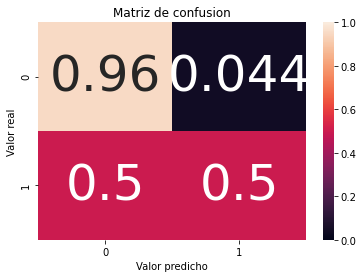

In [16]:
# Chequeemos la matriz de confusión

def plot_confusion_matrix(cm, classes=None, title='Matriz de confusion'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('Valor real')
    plt.xlabel('Valor predicho')
    
    
y_pred = modelo.predict(X_test)  # Predecimos sobre el conjunto de prueba

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=modelo.classes_, title='Matriz de confusion')


#### Si en los datos de entrada el número de muestras de cada caso está desbalanceado como es este caso, la tasa de error del clasificador no es representativa de lo bien que el clasificador realiza la tarea.  Por ejemplo en este caso hay 16% de clientes agotados (valor 1) y un 84% de clientes no agotados (valor 0), por lo cual es facil que el clasificador tenga un sesgo hacia el valor 0. Si el clasificador clasificara todas las muestras como clase 0, tendría una precisión alta pero eso no significaría que sea un buen clasificador ya que hubiera tenido 100% de error en la clasificación de las muestras de la clase 1

#### Considerando 1 como caso positivo:

#### Valores: 

#### True Positive (TP). Se predijo positivo y es cierto. TP = 0.50 (50%)

#### True Negative (TN). Se predijo negativo y es cierto. TN = 0.96 (96%)

#### False Positive (FP) (Error de tipo 1). Se predijo positivo y es falso. FP = 0.044 (4,4%)

#### False Negative (FN) (Error de tipo 2). Se predijo negativo y es falso. FN = 0.50 (50%)

### Accuracy:

#### La accuracy o precisión es la cantidad de resultados verdaderos (Tanto positivos verdaderos como negativos verdaderos) sobre el número total de casos exáminados

<a href="https://www.codecogs.com/eqnedit.php?latex=Accuracy&space;=&space;\frac{TP&space;&plus;&space;TN}{TP&space;&plus;&space;TN&space;&plus;&space;FP&space;&plus;&space;FN}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Accuracy&space;=&space;\frac{TP&space;&plus;&space;TN}{TP&space;&plus;&space;TN&space;&plus;&space;FP&space;&plus;&space;FN}" title="Accuracy = \frac{TP + TN}{TP + TN + FP + FN}" /></a>

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("La acurracy del clasificador en el set de prueba es de: ", acc)

La acurracy del clasificador en el set de prueba es de:  0.8874629812438302


In [18]:
## Ahora predecimos respecto al conjunto de entrenamiento

y_pred = modelo.predict(X_train)
comp = pd.DataFrame({'real':y_train,'prediccion': y_pred})

acc = accuracy_score(y_train, y_pred)
print("La acurracy del clasificador en el set de entrenamiento es de: ", acc)


La acurracy del clasificador en el set de entrenamiento es de:  0.8908013544018059


### Curva ROC

#### La curva AUC - ROC es una medida del rendimiento para el problema de clasificación. ROC (Receiver Operating Characteristic) es una curva de probabilidad y AUC representa el grado o la medida de la separabilidad. Indica en que medida el modelo es capaz de distinguir entre clases. Cuanto más alto es el AUC, mejor es que el modelo predice 0s como 0s y 1s como 1s

#### En la curva ROC se traza con TPR con el FPR donde TPR está en el eje y FPR en el eje x.

<img src="IMG_AUC_ROC.jpg" width=360 height=360 />



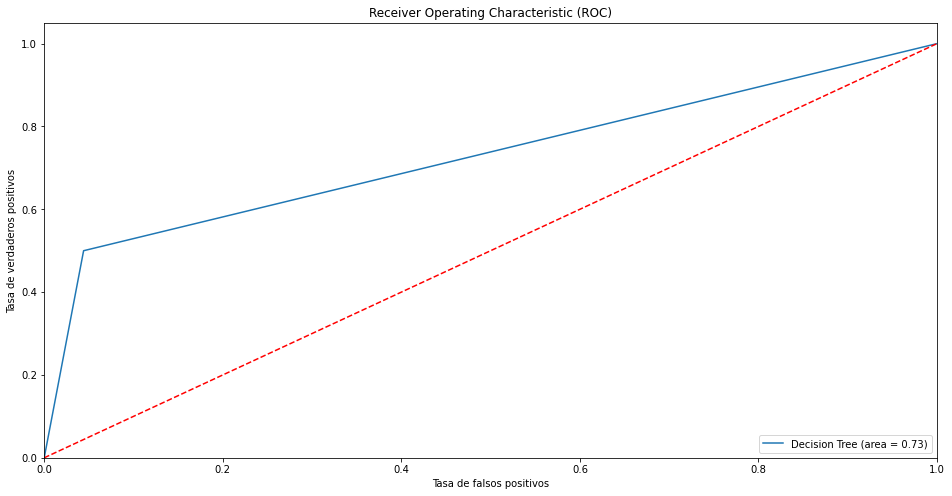

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred = modelo.predict(X_test)



logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, modelo.predict(X_test))

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Sin embargo, tiene poco sentido usarlo para ajustar el umbral (ya que, por supuesto, no existe el umbral en los árboles de decisión), pero aún se puede usar para calcular el AUC, que, en este caso, es 0,73. Será de utilidad al probar la regresión logística

